# ALGORITMO NAIVE BAYES

Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
sns.set_style("darkgrid")

# Carregar Database

In [45]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


# Calcular P(Y=y) para todos os possíveis y

In [46]:
def calcular_prior(df, coluna_alvo):
    # Obtendo as classes únicas da coluna alvo
    classes_unicas = sorted(list(df[coluna_alvo].unique()))
    
    # Calculando as probabilidades a priori para cada classe
    prior_probabilidades = []
    for classe in classes_unicas:
        # Contando quantos exemplos pertencem a cada classe
        num_exemplos_classe = len(df[df[coluna_alvo] == classe])
        
        # Calculando a priori para a classe atual
        prior_classe = num_exemplos_classe / len(df)
        
        # Adicionando a priori calculada à lista
        prior_probabilidades.append(prior_classe)
    
    return prior_probabilidades


In [47]:

def calcular_likelihood_gaussiana(df, nome_atributo, valor_atributo, coluna_alvo, classe_alvo):
    # Filtrando o DataFrame para conter apenas exemplos da classe alvo
    df_classe_alvo = df[df[coluna_alvo] == classe_alvo]
    
    # Calculando média e desvio padrão do atributo na classe alvo
    media = df_classe_alvo[nome_atributo].mean()
    desvio_padrao = df_classe_alvo[nome_atributo].std()
    
    # Calculando a likelihood gaussiana
    p_x_dado_y = (1 / (np.sqrt(2 * np.pi) * desvio_padrao)) * np.exp(-((valor_atributo - media)**2 / (2 * desvio_padrao**2)))
    
    print(p_x_dado_y)
    
    return p_x_dado_y


# Algoritmo Naive Bayes

In [48]:

def naive_bayes_gaussian(df, X, Y):
    # Obter os nomes das características (atributos)
    features = list(df.columns)[:-1]  # Todas as colunas exceto a última que é a coluna alvo (Y)

    # Calcular as probabilidades a priori
    prior = calcular_prior(df, Y)

    Y_pred = []
    # Iterar sobre cada amostra de dados em X
    for sample in X:
        # Calcular a verossimilhança para cada classe
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calcular_likelihood_gaussiana(df, features[i], sample[i], Y, labels[j])

        # Calcular a probabilidade a posteriori (apenas o numerador)
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        # Prever a classe com maior probabilidade a posteriori
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


# Testar Modelo Gaussiano

In [49]:


# Dividir os dados em conjunto de treinamento e teste
train, test = train_test_split(data, test_size=0.2, random_state=41)

# Extrair os conjuntos de características (X) e alvo (Y) do conjunto de teste
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Chamar a função naive_bayes_gaussian para prever as classes do conjunto de teste
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Calcular e imprimir a matriz de confusão e o escore F1
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred))
print()
print(f"Escore F1: {f1_score(Y_test, Y_pred)}")


0.041707710001762224
0.07631265483806257
0.005197927562765323
0.000469139584710637
9.72358698561205
0.2147550512360814
0.09684731268550094
0.03294317322838132
0.002876113756346131
25.86793053649501
0.09316054877804382
0.021267409972041042
0.012607668532189625
0.0008241296649146578
16.26835814990304
0.0783485773345504
0.07070507902720231
0.012575810697424089
0.0009475702069992098
30.397352162891604
0.09027230340000841
0.026792428210237015
0.013083811583172827
0.0007908703198191566
23.240133416582076
0.08601238971774608
0.07735961541455857
0.01129386703307682
0.0011314631336537496
7.646089557378853
0.04312508914374766
0.07243639721013423
0.006394777776161783
0.00046295437848924663
29.864451428801154
0.21266478028919517
0.09720433132406248
0.03096313699076387
0.002888429181470194
14.506660176571732
0.03875938110445294
0.05240786831129068
0.004728210074407484
0.0004480130032647049
2.814688316048922
0.21819924373201643
0.09433407285050446
0.033246460482075205
0.0029111061812289785
13.938268

# Convertendo os resultados em gráficos

In [50]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


Matriz de Confusão:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  2  8]]

Escore F1: 0.9324074074074074


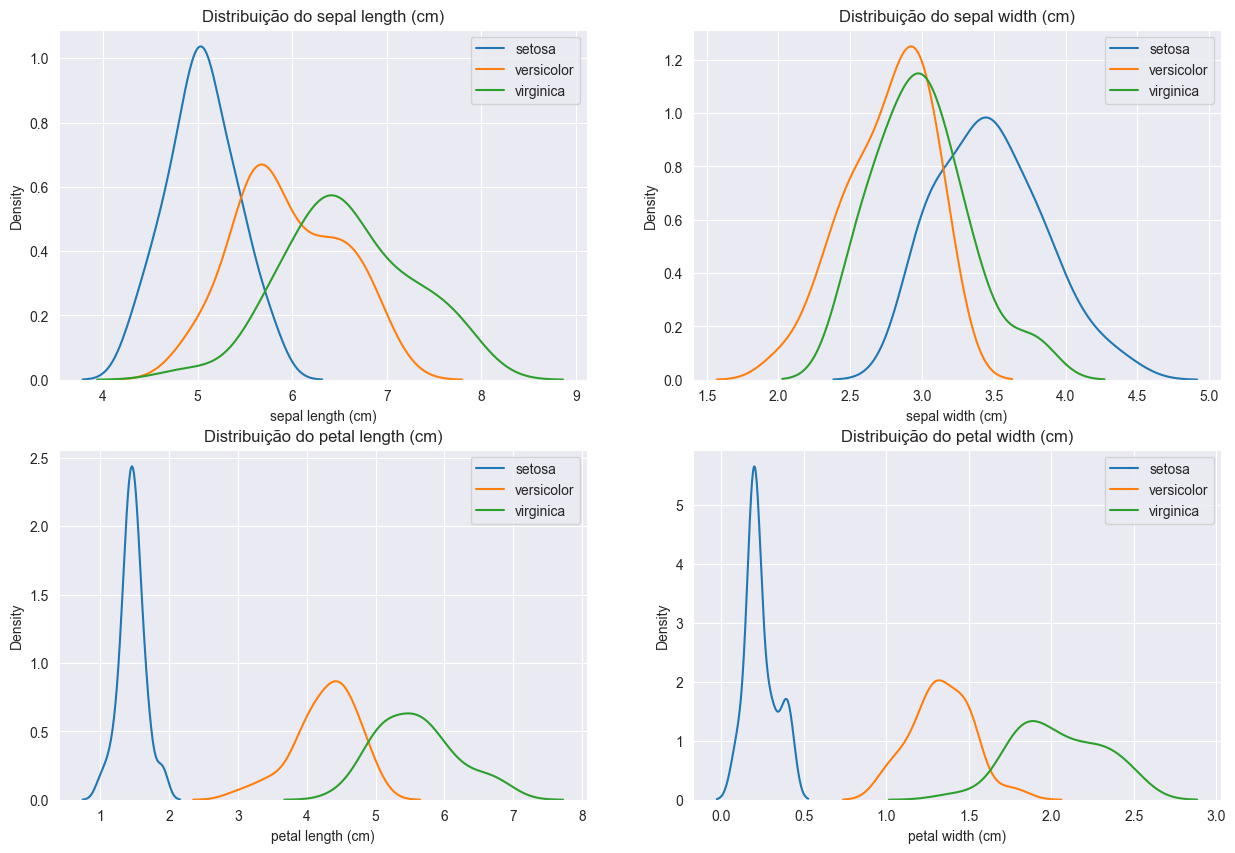

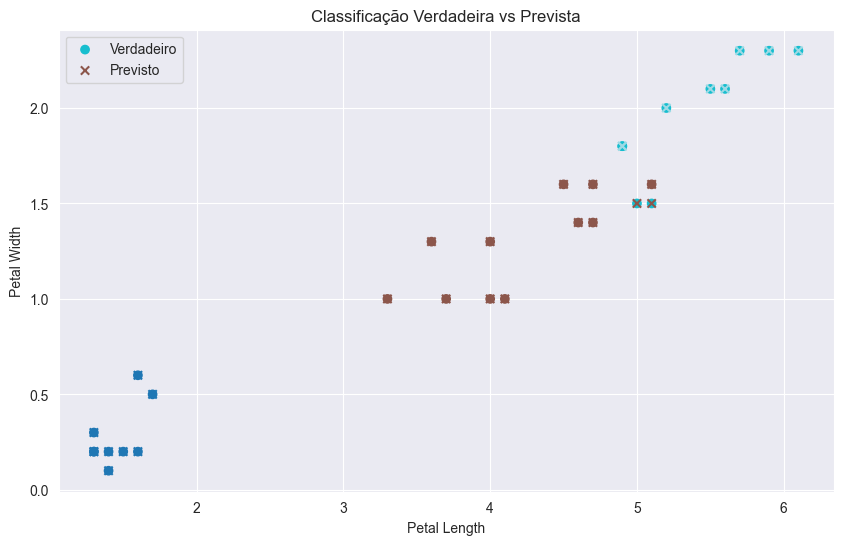

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Função para calcular as probabilidades a priori
def calcular_prior(df, coluna_alvo):
    classes_unicas = sorted(list(df[coluna_alvo].unique()))
    prior_probabilidades = []
    for classe in classes_unicas:
        num_exemplos_classe = len(df[df[coluna_alvo] == classe])
        prior_classe = num_exemplos_classe / len(df)
        prior_probabilidades.append(prior_classe)
    return prior_probabilidades

# Função para calcular a likelihood gaussiana
def calcular_likelihood_gaussiana(df, nome_atributo, valor_atributo, coluna_alvo, classe_alvo):
    df_classe_alvo = df[df[coluna_alvo] == classe_alvo]
    media = df_classe_alvo[nome_atributo].mean()
    desvio_padrao = df_classe_alvo[nome_atributo].std()
    p_x_dado_y = (1 / (np.sqrt(2 * np.pi) * desvio_padrao)) * np.exp(-((valor_atributo - media)**2 / (2 * desvio_padrao**2)))
    return p_x_dado_y

# Função Naive Bayes Gaussiano
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calcular_prior(df, Y)
    Y_pred = []
    probs = []
    for sample in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calcular_likelihood_gaussiana(df, features[i], sample[i], Y, labels[j])
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
        probs.append(post_prob)
    return np.array(Y_pred), np.array(probs)

# Carregar e dividir os dados (exemplo usando Iris Dataset)
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data['target'] = data['target'].astype(int)

# Dividir os dados em conjunto de treinamento e teste
train, test = train_test_split(data, test_size=0.2, random_state=41)

# Extrair os conjuntos de características (X) e alvo (Y) do conjunto de teste
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Chamar a função naive_bayes_gaussian para prever as classes do conjunto de teste
Y_pred, probs = naive_bayes_gaussian(train, X_test, 'target')

# Calcular e imprimir a matriz de confusão e o escore F1
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred))
print()
print(f"Escore F1: {f1_score(Y_test, Y_pred, average='weighted')}")

# Visualização das distribuições de probabilidade
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
atributos = iris.feature_names
classes = iris.target_names

for i, atributo in enumerate(atributos):
    row, col = divmod(i, 2)
    for classe in classes:
        sns.kdeplot(train[train['target'] == list(classes).index(classe)][atributo], label=classe, ax=axs[row, col])
    axs[row, col].set_title(f'Distribuição do {atributo}')
    axs[row, col].legend()

plt.show()

# Visualização da classificação
plt.figure(figsize=(10, 6))

# Usando Petal Length e Petal Width para visualização
plt.scatter(X_test[:, 2], X_test[:, 3], c=Y_test, cmap='tab10', marker='o', label='Verdadeiro')
plt.scatter(X_test[:, 2], X_test[:, 3], c=Y_pred, cmap='tab20', marker='x', label='Previsto')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Classificação Verdadeira vs Prevista')
plt.legend(['Verdadeiro', 'Previsto'])
plt.show()

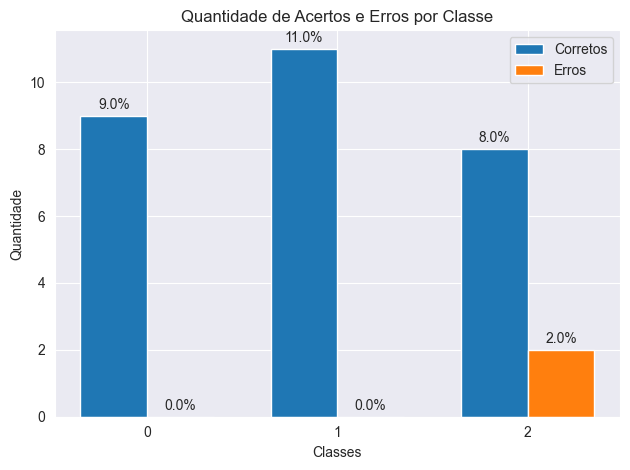

In [52]:
# Calcular a matriz de confusão e outras métricas
cm = confusion_matrix(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average=None)
accuracy = accuracy_score(Y_test, Y_pred)

# Extrair acertos e erros de cada classe
correct = np.diag(cm)
total = np.sum(cm, axis=1)
errors = total - correct

# Calcular porcentagens de acertos
percentages = (correct / total) * 100

# Preparar dados para o gráfico
labels = sorted(np.unique(Y_test))
x = np.arange(len(labels))
width = 0.35

# Plotar o gráfico de barras
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, correct, width, label='Corretos')
rects2 = ax.bar(x + width/2, errors, width, label='Erros')

# Adicionar detalhes ao gráfico
ax.set_xlabel('Classes')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Acertos e Erros por Classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adicionar porcentagens acima das barras
def autolabel(rects):
    """Função para adicionar rótulos nas barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Mostrar o gráfico
fig.tight_layout()
plt.show()

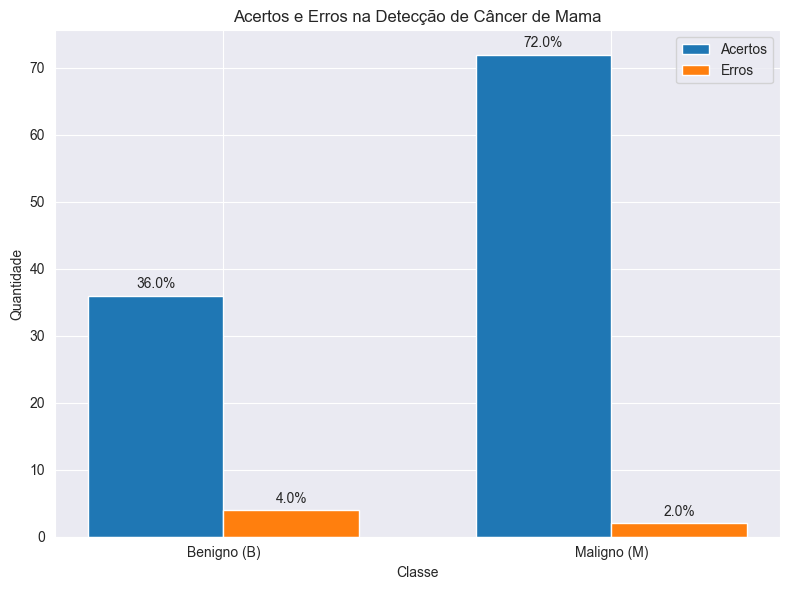

Matriz de Confusão:
[[36  4]
 [ 2 72]]

Escore F1: 0.96


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Função para calcular prior
def calcular_prior(df, coluna_alvo):
    classes_unicas = sorted(list(df[coluna_alvo].unique()))
    prior_probabilidades = []
    for classe in classes_unicas:
        num_exemplos_classe = len(df[df[coluna_alvo] == classe])
        prior_classe = num_exemplos_classe / len(df)
        prior_probabilidades.append(prior_classe)
    return prior_probabilidades

# Função para calcular likelihood gaussiano
def calcular_likelihood_gaussiana(df, nome_atributo, valor_atributo, coluna_alvo, classe_alvo):
    df_classe_alvo = df[df[coluna_alvo] == classe_alvo]
    media = df_classe_alvo[nome_atributo].mean()
    desvio_padrao = df_classe_alvo[nome_atributo].std()
    p_x_dado_y = (1 / (np.sqrt(2 * np.pi) * desvio_padrao)) * np.exp(-((valor_atributo - media)**2 / (2 * desvio_padrao**2)))
    return p_x_dado_y

# Função para Naive Bayes Gaussiano
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calcular_prior(df, Y)
    Y_pred = []
    for sample in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calcular_likelihood_gaussiana(df, features[i], sample[i], Y, labels[j])
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

# Carregar dados e pré-processamento
data = pd.read_csv("Breast_cancer_data.csv")
# Aqui você pode realizar qualquer pré-processamento necessário, como a discretização de atributos contínuos.

# Dividir dados em treino e teste
train, test = train_test_split(data, test_size=0.2, random_state=41)
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Executar o modelo Naive Bayes Gaussiano
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Calcular a matriz de confusão e o escore F1
cm = confusion_matrix(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Plotar gráfico de barras para mostrar acertos e erros
labels = ['Benigno (B)', 'Maligno (M)']
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(labels))

# Contagem de acertos e erros
acertos = np.diag(cm)
erros = np.sum(cm, axis=1) - acertos

# Plotagem das barras
rects1 = ax.bar(x - bar_width/2, acertos, bar_width, label='Acertos')
rects2 = ax.bar(x + bar_width/2, erros, bar_width, label='Erros')

# Adicionar rótulos, títulos e legenda
ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
ax.set_title('Acertos e Erros na Detecção de Câncer de Mama')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adicionar textos com porcentagens
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Exibir gráfico
fig.tight_layout()
plt.show()

# Exibir matriz de confusão e escore F1
print("Matriz de Confusão:")
print(cm)
print()
print(f"Escore F1: {f1}")
